In [1]:
import json
import fasttext
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
with open("labeled_reviews.json", "r", encoding="utf-8") as file:
    labeled_data = json.load(file)

In [3]:
# split data %80 for train, %20 for test
train_data, test_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

In [4]:
# writing the FastText train data into a file
with open("fasttext_train_data.txt", "w", encoding="utf-8") as train_file:
    for review in train_data:
        label = review["sentiment"]
        tokens = " ".join(review["tokens"])
        train_file.write(f"__label__{label} {tokens}\n")

In [5]:
# writing the FastText test data into a file
with open("fasttext_test_data.txt", "w", encoding="utf-8") as test_file:
    for review in test_data:
        label = review["sentiment"]
        tokens = " ".join(review["tokens"])
        test_file.write(f"__label__{label} {tokens}\n")

In [6]:
# train fasttext model
model = fasttext.train_supervised(input="fasttext_train_data.txt", epoch=70, lr=0.1, wordNgrams=2)

In [7]:
model.save_model("sentiment_model.bin")

In [8]:
true_labels = []
predicted_labels = []

In [9]:
for review in test_data:
    tokens = " ".join(review["tokens"])
    true_labels.append(review["sentiment"])
    prediction = model.predict(tokens)
    predicted_labels.append(prediction[0][0].replace("__label__", ""))

In [10]:
print(set(true_labels))
print(set(predicted_labels))


{'negative', 'positive', 'neutral'}
{'negative', 'neutral', 'positive'}


In [11]:
print(classification_report(true_labels, predicted_labels, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.84      0.72      0.78        29
     neutral       0.84      0.75      0.79        28
    positive       0.89      0.97      0.93        73

    accuracy                           0.87       130
   macro avg       0.86      0.82      0.83       130
weighted avg       0.87      0.87      0.87       130



In [12]:
true_labels = [review["sentiment"] for review in test_data]
predicted_labels = [model.predict(" ".join(review["tokens"]))[0][0].replace("__label__", "") for review in test_data]


In [13]:
print(len(true_labels), len(predicted_labels))

130 130


In [14]:
cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "negative","neutral"])

In [16]:
labels = ["Positive", "Negative", "Neutral"]

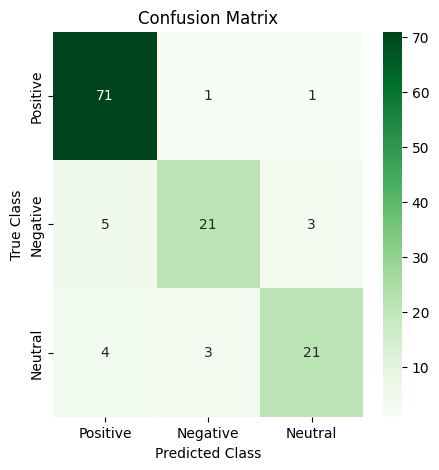

In [17]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [18]:
with open("filtered_products.json", "r", encoding="utf-8") as file:
    products_data = json.load(file)

In [19]:
for product in products_data:
    for review in product["reviews"]:
        if "predicted_sentiment" not in review:
            tokens = " ".join(review["tokens"])
            prediction = model.predict(tokens)
            predicted_label = prediction[0][0].replace("__label__", "")
            review["predicted_sentiment"] = predicted_label

In [21]:
# write prediction results into a file
with open("predicted_products.json", "w", encoding="utf-8") as file:
    json.dump(products_data, file, indent=2, ensure_ascii=False)

In [22]:
file_path = "predicted_products.json"

In [23]:
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

In [24]:
for i, review in enumerate(labeled_data[:100]):
    print(f"{i + 1}. Name: {review['name']}, Sentiment: {review['sentiment']}, Review: {review['tokens']}")

1. Name: Biotin 2000 Mcg 100 Tablet, Sentiment: positive, Review: ['hızlı', 'teslimat', 'özenli', 'paketleme']
2. Name: Biotin 2000 Mcg 100 Tablet, Sentiment: neutral, Review: ['fiyatı', 'uygun', 'güzel', 'paketlenmiş', 'saç', 'dökülmem', 'aldım', 'umarım', 'yarar']
3. Name: Biotin 2000 Mcg 100 Tablet, Sentiment: neutral, Review: ['güzel', 'paketlenmiş', 'hızlı', 'şeklide', 'elime', 'ulaştı', 'işe', 'yaramasını', 'umuyorum']
4. Name: Biotin 2000 Mcg 100 Tablet, Sentiment: positive, Review: ['sürekli', 'kullandığım', 'güvenilir', 'bir', 'marka', 'paketlenmesi', 'gayet', 'başarılı', 'almak', 'isteyen', 'varsa', 'düşünmeden', 'markayı', 'tercih', 'etmeli']
5. Name: Biotin 2000 Mcg 100 Tablet, Sentiment: negative, Review: ['bitmek', 'üzere', 'fayda', 'yok', 'maalesef']
6. Name: Biotin 2000 Mcg 100 Tablet, Sentiment: negative, Review: ['2ay', 'old', 'kullanmaya', 'basladim', 'bi', 'etki', 'göremedim']
7. Name: Microfer Şurup 250 ml, Sentiment: neutral, Review: ['boyu', 'baya', 'buyuk', 'tad